   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


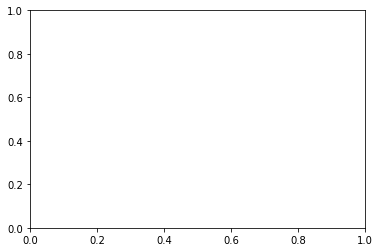

In [3]:
# 기본셋팅
import matplotlib.pyplot as plt
import seaborn as sns

# tips데이터 불러오기 및 저장
# 손님들이 지불한 tip정보
tips = sns.load_dataset("tips")
print(tips.head())

# 번 그래프 그리기
fig = plt.figure()
# add_subplot(행 크기, 열 크기, 들어갈 위치)
axes1 = fig.add_subplot(1,1,1)

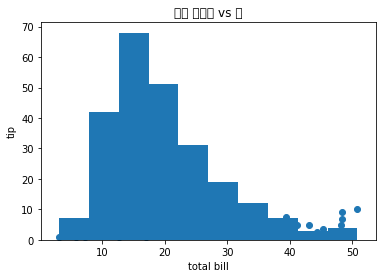

In [14]:
# 히스토그램
# 히스토그램 분포도
# hist(변수['컬럼'], x축 간격 10)
axes1.hist(tips['total_bill'], bins = 10)
# 상단의 이름
axes1.set_title('Histogram of total Bill')
# x축의 이름
axes1.set_xlabel('Frequency')
# y축의 이름
axesl.set_ylabel('Total Bill')

fig

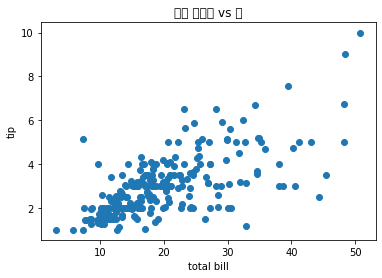

In [15]:
# 산점도 그래프
# 기본 틀 생성
scatter_plot = plt.figure()
# 그래프 격자 생성
axes1 = scatter_plot.add_subplot(1,1,1)

# scatter(변수[컬럼_1 : total_bill], 변수[컬럼_2:tip])
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('전체 지불액 vs 팁') # 한글은 잘 적용되지 않는다.
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')
plt.show()

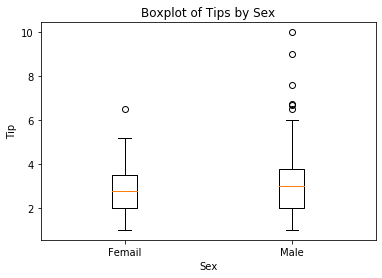

In [16]:
# 박스 그래프
# 기본 틀 생선
boxplot = plt.figure()
# 격자 생성
axes1 = boxplot.add_subplot(1,1,1)

# tips데이터 프레임에서 성별이 남자와 여자인 데이터에서 tips 열 데이터만 추출하여
# 리스트에 담아 전달
# 데이터프레임[데이터 프레임내의 ['컬럼명'] == ['femail'][열 선택 추출]]
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
              labels = ['Femail','Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')
               
plt.show()

In [23]:
# 다변량 그래프
# 문자열 데이터 치환과정 male, female -> 남자_1, 여자_0
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

# apply함수활용
# tips['sex_color'] 새로운 컴럼 생성 = tips의 ['sex']에.함수적용(자체함수)
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips.head()# 새로운 변수 확인

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


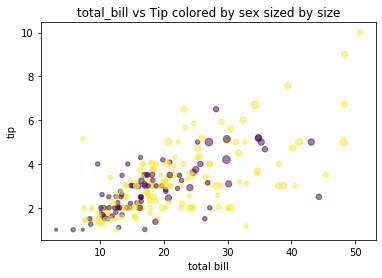

In [24]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
x = tips['total_bill'],
y = tips['tip'],
s = tips['size'] * 10, # s는 점의 크기를 할당, 점의 크기를 인원수로 설정
c = tips['sex_color'], # c는 생상을 할당, 남자, 여자로 분리하여 할당
alpha = 0.5) # 투명도

axes1.set_title('total_bill vs Tip colored by sex sized by size')
axes1.set_xlabel('total bill')
axes1.set_ylabel('tip')

plt.show()

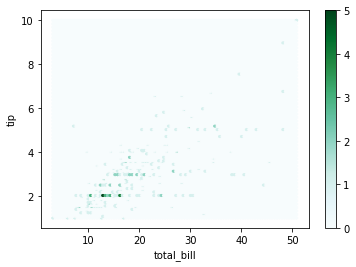

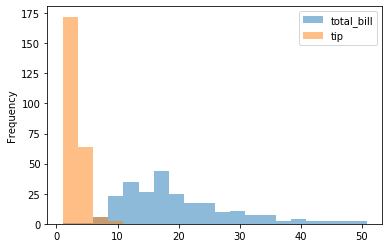

In [25]:
# 산점도
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y = 'tip', ax = ax)
# 히스토그램
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha = 0.5, bins = 20, ax = ax)

In [34]:
# 결측치
from numpy import NaN, NAN, nan
# isnull을 통해 결측값 검사
print(pd.isnull((NaN)))
print(pd.isnull((nan)))
print(pd.isnull((NAN)))

visited = pd.read_csv('survey_visited.csv')
survey = pd.read_csv('survey_survey.csv')

print(visited)
print(survey)

True
True
True
   ident   site       dated
0    619   DR-1  1927-02-08
1    622   DR-1  1927-02-10
2    734   DR-3  1939-01-07
3    735   DR-3  1930-01-12
4    751   DR-3  1930-02-26
5    752   DR-3         NaN
6    837  MSK-4  1932-01-14
7    844   DR-1  1932-03-22
    taken person quant  reading
0     619   dyer   rad     9.82
1     619   dyer   sal     0.13
2     622   dyer   rad     7.80
3     622   dyer   sal     0.09
4     734     pb   rad     8.41
5     734   lake   sal     0.05
6     734     pb  temp   -21.50
7     735     pb   rad     7.22
8     735    NaN   sal     0.06
9     735    NaN  temp   -26.00
10    751     pb   rad     4.35
11    751     pb  temp   -18.50
12    751   lake   sal     0.10
13    752   lake   rad     2.19
14    752   lake   sal     0.09
15    752   lake  temp   -16.00
16    752    roe   sal    41.60
17    837   lake   rad     1.46
18    837   lake   sal     0.21
19    837    roe   sal    22.50
20    844    roe   rad    11.25


In [39]:
# 데이터 결합을 위한 merge()
vs = visited.merge(survey, left_on='ident', right_on = 'taken')
print(vs)
print(vs.count()) #열 별로 결측값 출력
print("==========================================================")
# 결측값 삭제하기
vs_dropna = vs.dropna()
print(vs_dropna)
print("==========================================================")
# 결측값 0 처리
vs_fillna = vs.fillna(0)
print(vs_fillna)

    ident   site       dated  taken person quant  reading
0     619   DR-1  1927-02-08    619   dyer   rad     9.82
1     619   DR-1  1927-02-08    619   dyer   sal     0.13
2     622   DR-1  1927-02-10    622   dyer   rad     7.80
3     622   DR-1  1927-02-10    622   dyer   sal     0.09
4     734   DR-3  1939-01-07    734     pb   rad     8.41
5     734   DR-3  1939-01-07    734   lake   sal     0.05
6     734   DR-3  1939-01-07    734     pb  temp   -21.50
7     735   DR-3  1930-01-12    735     pb   rad     7.22
8     735   DR-3  1930-01-12    735    NaN   sal     0.06
9     735   DR-3  1930-01-12    735    NaN  temp   -26.00
10    751   DR-3  1930-02-26    751     pb   rad     4.35
11    751   DR-3  1930-02-26    751     pb  temp   -18.50
12    751   DR-3  1930-02-26    751   lake   sal     0.10
13    752   DR-3         NaN    752   lake   rad     2.19
14    752   DR-3         NaN    752   lake   sal     0.09
15    752   DR-3         NaN    752   lake  temp   -16.00
16    752   DR

In [ ]:
# sqlite-db연결 및 쿼리 수행

import sqlite3

#import os
#print(os.getcwd())

#db와 연결
conn = sqlite3.connect('world.db')
#열결 확인
type(conn)

#실행
cursor = conn.cursor()
# 쿼리 작성 및 테이블 생성 (삼성 주식관련 내용)
cursor.execute("CREATE TABLE samsung(Date text, Open int, High int, Low int, Closing int, Volumn int)")
cursor.execute("INSERT INTO samsung VALUES('20.07.08', 55800, 55900, 53400, 55000, 357)")
for row in cursor.execute("INSERT INTO samsung VALUES('20.07.07', 55800, 55900, 53400, 55000, 357)"):
    print(row)

conn.commit()
conn.close()

In [ ]:
cursor.execute("drop table samsung")